# DIABETES PREDICTION TOOL 

## IMPORT LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
import seaborn as sns
from sklearn import svm, model_selection, linear_model
import ipywidgets as widgets
import watermark


## IMPORT DATASET

In [2]:
#Load the dataset
diabetes_dataframe = pd.read_csv('diabetes.csv')

## CLEAN DATA

In [3]:
#Drop the skin thickness column
diabetes_data = diabetes_dataframe.drop(['SkinThickness'], axis = 1)

#However, some variables cannot contain zeros. Therefore, zeros should be treated as missing data

In [4]:
#Replace the zeros with NaN
diabetes_data[['Glucose', 'BloodPressure', 'Insulin', 'BMI', 'Age']] = diabetes_data[['Glucose', 'BloodPressure', 'Insulin', 'BMI', 'Age']].replace(0, np.NaN)

In [5]:
#Check to see if there are any missing data
diabetes_data.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [6]:
#Replace the NaN with mean and median values
diabetes_data['Glucose'].fillna(diabetes_data['Glucose'].mean(), inplace=True)
diabetes_data['BloodPressure'].fillna(diabetes_data['BloodPressure'].mean(), inplace=True)
diabetes_data['BMI'].fillna(diabetes_data['BMI'].mean(), inplace=True)
diabetes_data['Age'].fillna(diabetes_data['Age'].mean(), inplace=True)
#The Insulin column contains some extreme values, use median instead
diabetes_data['Insulin'].fillna(diabetes_data['Insulin'].median(), inplace=True)


In [7]:
#Check for missing data again
diabetes_data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [8]:
diabetes_data

,Pregnancies,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,125.0,23.3,0.672,32,1
3,1,89.0,66.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,180.0,32.9,0.171,63,0
764,2,122.0,70.0,125.0,36.8,0.340,27,0
765,5,121.0,72.0,112.0,26.2,0.245,30,0
766,1,126.0,60.0,125.0,30.1,0.349,47,1


## VISUALIZE DATA

In [9]:
diabetes_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.000000,6.00000,17.00
Glucose,768.0,121.686763,30.435949,44.000,99.75000,117.000000,140.25000,199.00
BloodPressure,768.0,72.405184,12.096346,24.000,64.00000,72.202592,80.00000,122.00
Insulin,768.0,140.671875,86.383060,14.000,121.50000,125.000000,127.25000,846.00
BMI,768.0,32.457464,6.875151,18.200,27.50000,32.400000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.372500,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.000000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.000000,1.00000,1.00


In [10]:
#Create a new column to display diabetes vs non-diabetes instead of 0 and 1
diabetes_df = pd.read_csv('diabetes.csv')
diabetes_df['Diabetes Status'] = diabetes_data['Outcome'].map({0: 'Non-diabetes', 1: 'Diabetes'})

In [11]:
#Count the number of outcomes
outcome_counts = diabetes_data['Outcome'].value_counts()
outcome_counts

0    500
1    268
Name: Outcome, dtype: int64

### Count plot showing the number of diabetics vs non-diabetics

Text(0, 0.5, 'Count')

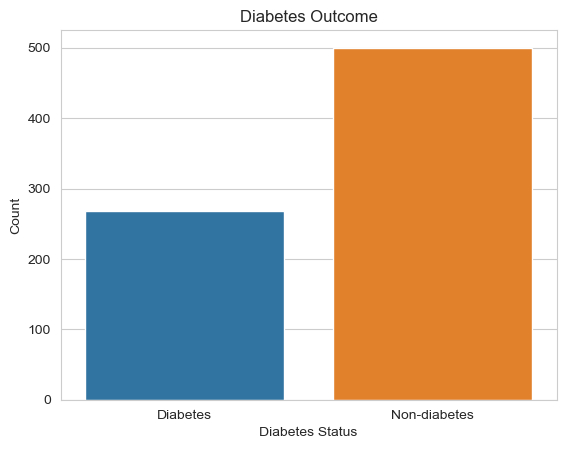

In [12]:
sns.set_style("whitegrid")
plt.title('Diabetes Outcome')
sns.countplot(x = 'Diabetes Status', data = diabetes_df)
plt.ylabel('Count')

### A pie chart for the Outcome column 

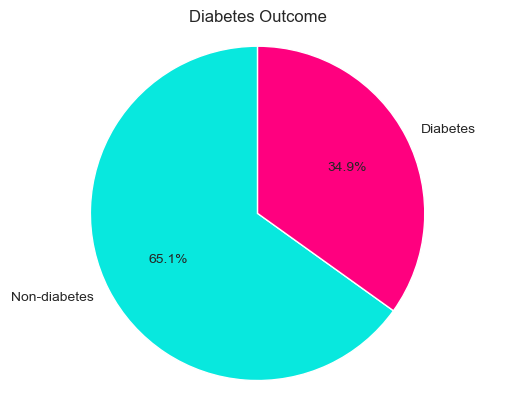

In [13]:
# Create a pie chart
labels = ['Non-diabetes', 'Diabetes']
colors = ['#08E8DE', '#FF007F']
plt.pie(outcome_counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Diabetes Outcome')
plt.show()

### Count plot showing the relationship between the number of pregnancies and outcomes

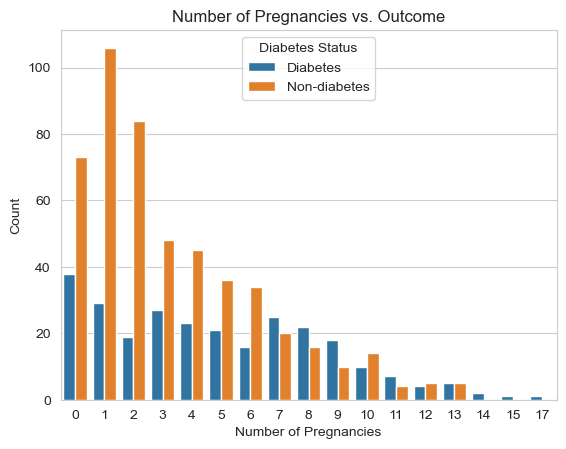

In [14]:
sns.countplot(x = 'Pregnancies', data = diabetes_df, hue = "Diabetes Status")
plt.xlabel('Number of Pregnancies')
plt.ylabel('Count')
plt.title('Number of Pregnancies vs. Outcome')
plt.show()

### A Scatter Plot to display the relationship between outcome vs insulin and blood sugar

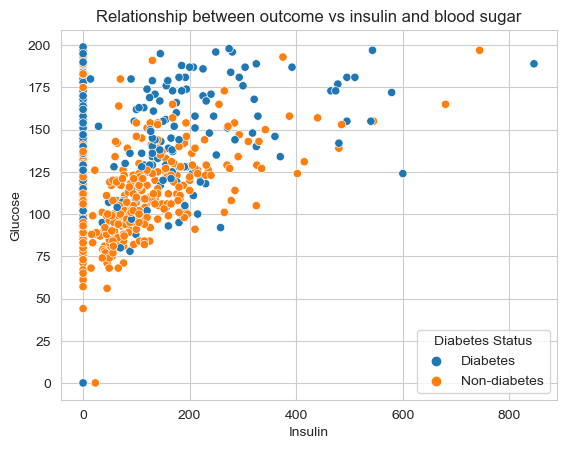

In [15]:
sns.scatterplot(data = diabetes_df, x = 'Insulin', y = 'Glucose', hue = 'Diabetes Status')
plt.title('Relationship between outcome vs insulin and blood sugar')
plt.show()

### Pairplot to visualize the correlation of Outcomes and the other factors


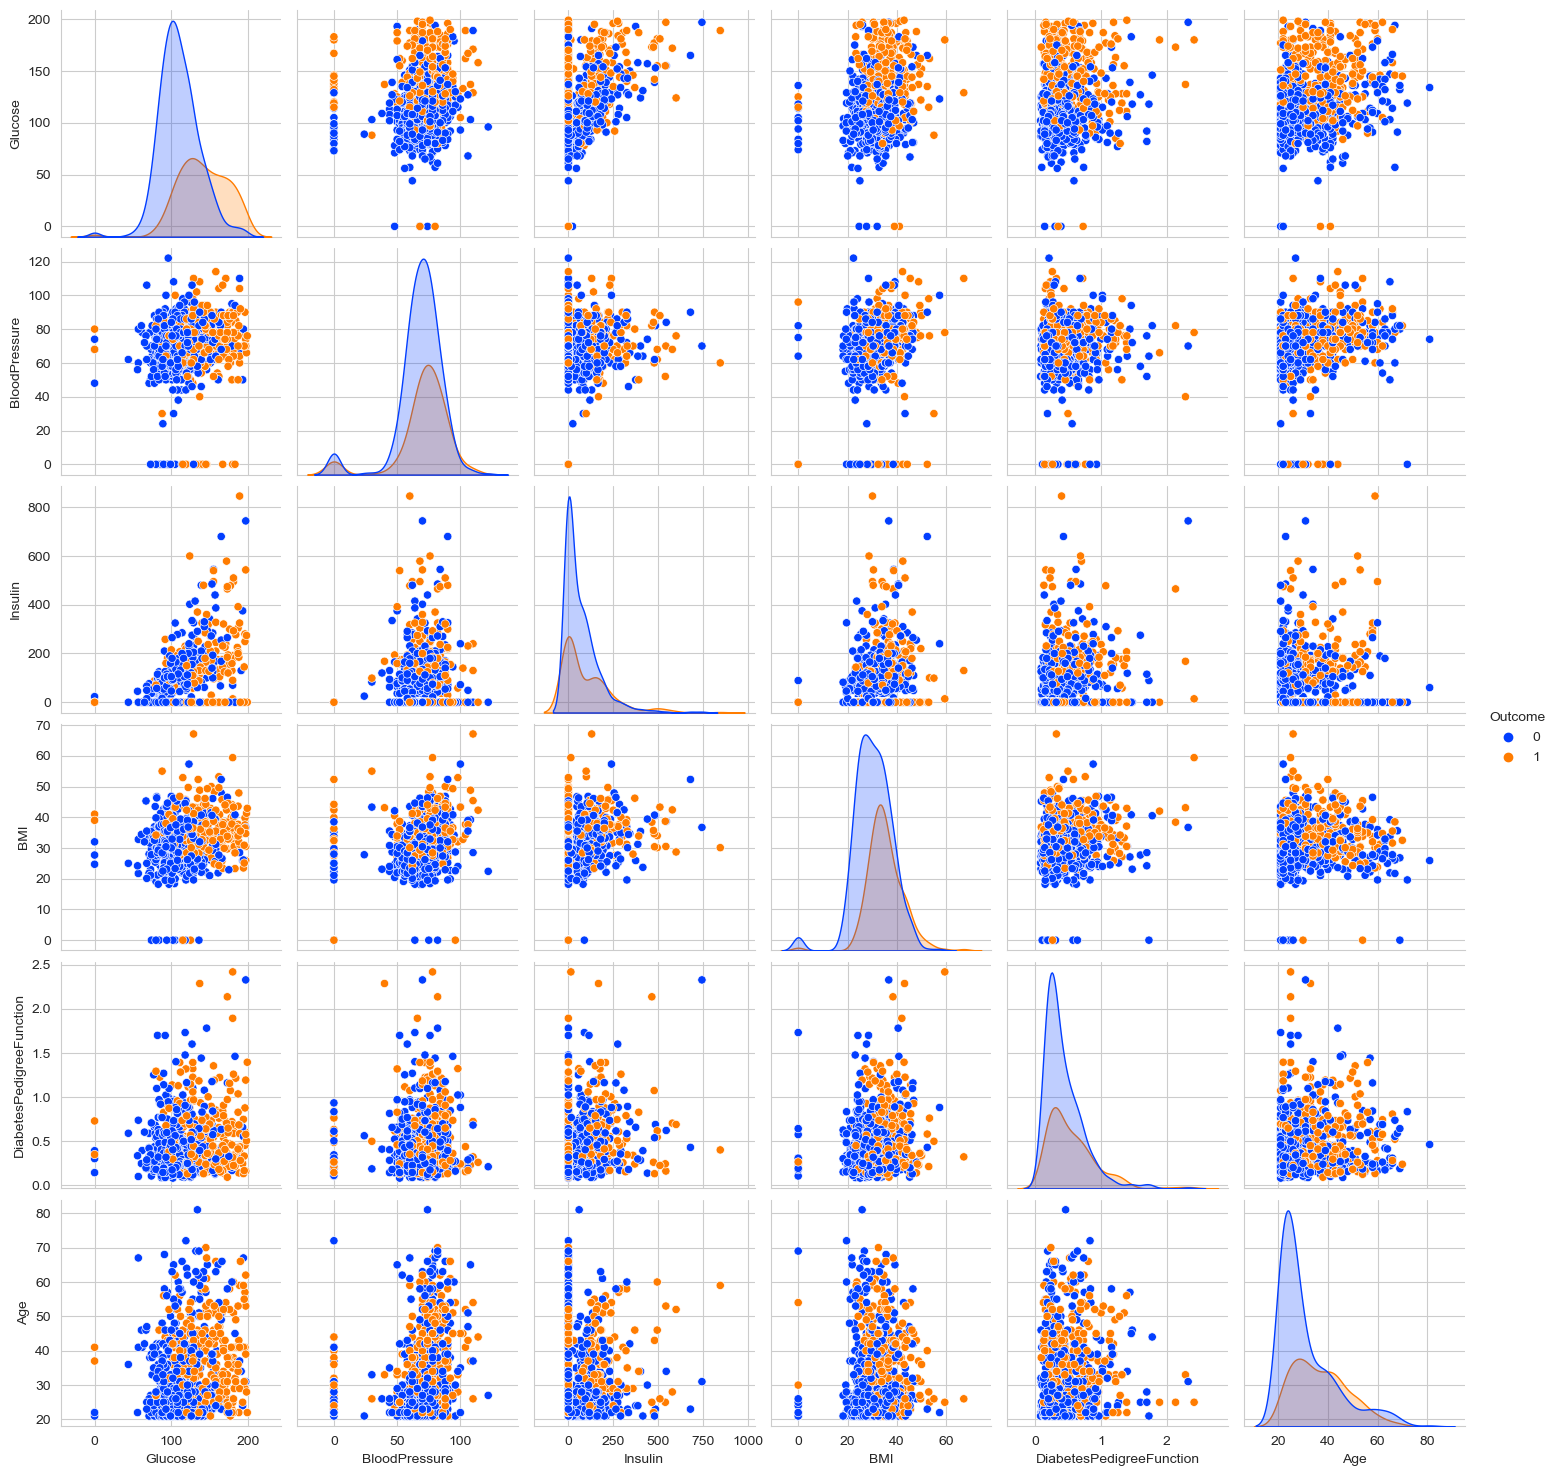

In [16]:
#Drop the outcome, skin thickness and diabetes pedigree function columns
diabetes_data_pairplot = diabetes_dataframe.drop(['Pregnancies','SkinThickness'], axis = 1)
sns.pairplot(diabetes_data_pairplot, hue = 'Outcome', palette = 'bright')

## MAKE PREDICTIONS

In [17]:
#Split the data into training and test sets
X = diabetes_data.drop('Outcome', axis=1)
y = diabetes_data['Outcome']
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.2, random_state = 42)

#Make an instance of the model
my_model = linear_model.LogisticRegression()

#Training the model on the data
my_model.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(my_model.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(my_model.score(X_test, y_test)))

Accuracy on training set: 0.772
Accuracy on test set: 0.766


## USER- INTERFACE

In [18]:
#Create input widgets
age = widgets.IntSlider(
    description = 'Age:',
    value = 50,
    min = 18,
    max = 110,
    step = 1,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
)
pregnancies = widgets.IntSlider(
    description = 'Pregnancies:',
    value = 2,
    min = 0,
    max = 30,
    step = 1,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d'
)
blood_pressure = widgets.IntSlider(
    description = 'Blood Pressure:',
    value = 70,
    min = 40,
    max = 400,
    step = 1,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d'
)
insulin = widgets.IntSlider(
    description = 'Insulin:',
    value = 100,
    min = 0,
    max = 400,
    step = 1,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d'
)
glucose = widgets.IntSlider(
    description = 'Glucose:',
    value = 100,
    min = 0,
    max = 400,
    step = 1,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d'
)
bmi = widgets.FloatText(
    description = 'BMI:',
    value = 18.0,
    min = 0,
    max = 100.0,
    step = 0.1,
    continuous_update=False,
    readout=True,
)
pedigree = widgets.FloatText(
    description = 'Diabetes Pedigree Function:',
    value = 0.200,
    min = 0,
    max = 2.420,
    step = 0.001,
    continuous_update = False,
    readout = True,
)
output = widgets.Output()

In [19]:
# Define the predict function
def predict(age, pregnancies, blood_pressure, insulin, glucose, bmi, pedigree):
    # Create a DataFrame
    input_df = pd.DataFrame([[age, pregnancies, blood_pressure, insulin, glucose, bmi, pedigree]],
                            columns=['Age', 'Pregnancies', 'Glucose', 'Blood Pressure', 'Insulin', 'BMI', 'Diabetes Pedigree Function'])
    # Make a prediction 
    prediction = my_model.predict(input_df)[0]
    # Print the result
    if prediction == 1:
        result = 'diabetes'
    else:
        result = 'no diabetes'
    with output:
        output.clear_output()
        print(result)

In [20]:
# Define the button widget
button = widgets.Button(description='Predict')

# Define the event handler for the button
def on_button_clicked(_):
    with output:
        output.clear_output()
        predict(pregnancies.value, glucose.value, blood_pressure.value, insulin.value, bmi.value, pedigree.value, age.value)

button.on_click(on_button_clicked)

In [21]:
# Display the widgets
widgets.VBox([age, pregnancies, blood_pressure, insulin, glucose, bmi, pedigree, button, output])

In [22]:

%load_ext watermark
%watermark -v -m -p pandas,numpy,matplotlib,sklearn,seaborn,ipywidgets,jupyter,jupyterlab,watermark

Python implementation: CPython
Python version       : 3.9.13
IPython version      : 7.31.1

pandas    : 1.4.4
numpy     : 1.21.5
matplotlib: 3.5.2
sklearn   : 1.0.2
seaborn   : 0.11.2
ipywidgets: 7.7.0
jupyter   : 1.0.0
jupyterlab: 3.4.8
watermark : 2.3.1

Compiler    : Clang 12.0.0 
OS          : Darwin
Release     : 22.1.0
Machine     : x86_64
Processor   : i386
CPU cores   : 8
Architecture: 64bit

